In [1]:
# Importing necessary libraries
import pandas as pd

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Menampilkan statistik deskriptif dan informasi dataset
dataset_info = df.info()
statistik_deskriptif = df.describe()

# Menampilkan 5 baris pertama dataset untuk pemeriksaan awal
df_head = df.head()

dataset_info, statistik_deskriptif, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000,
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting style for the plots
sns.set(style="whitegrid")

In [4]:
# 1. Visualisasi distribusi usia
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Distribusi Usia')

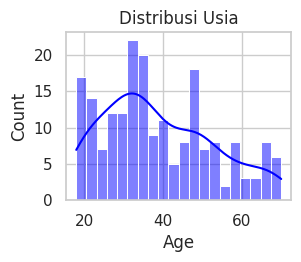

In [5]:
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribusi Usia')

Text(0.5, 1.0, 'Distribusi Pendapatan Tahunan (k$)')

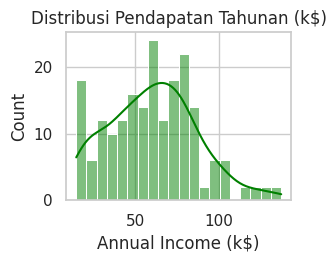

In [6]:
# 2. Visualisasi distribusi pendapatan tahunan
plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribusi Pendapatan Tahunan (k$)')

Text(0.5, 1.0, 'Distribusi Skor Pengeluaran (1-100)')

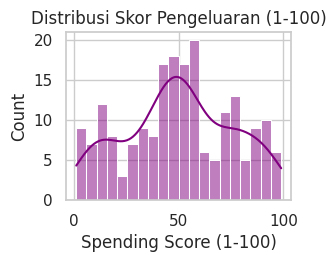

In [7]:
# 3. Visualisasi distribusi skor pengeluaran
plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='purple')
plt.title('Distribusi Skor Pengeluaran (1-100)')

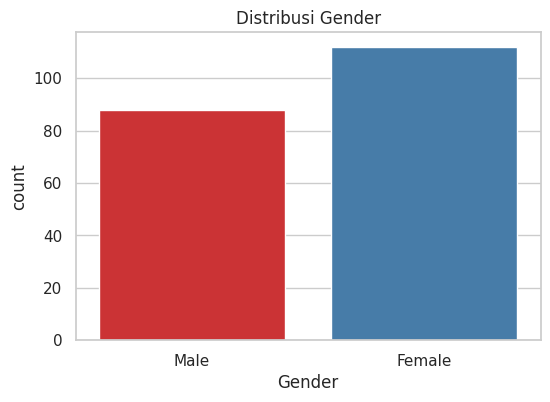

In [8]:
# 4. Visualisasi distribusi gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set1', legend=False)  # Assign 'x' to 'hue' and set 'legend=False'
plt.title('Distribusi Gender')
plt.show()

In [9]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [10]:
# Memeriksa nilai NaN dalam dataset
cek_nan = df.isnull().sum()

In [11]:
# Deteksi outlier menggunakan boxplot untuk kolom numerik
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Outlier pada Usia')

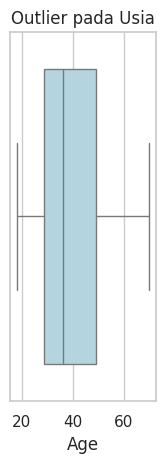

In [12]:
# Boxplot untuk Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Outlier pada Usia')


Text(0.5, 1.0, 'Outlier pada Pendapatan Tahunan')

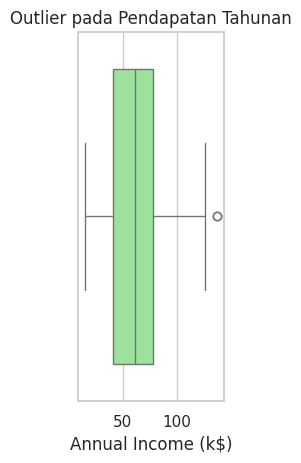

In [13]:
# Boxplot untuk Annual Income
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Annual Income (k$)'], color='lightgreen')
plt.title('Outlier pada Pendapatan Tahunan')

Text(0.5, 1.0, 'Outlier pada Skor Pengeluaran')

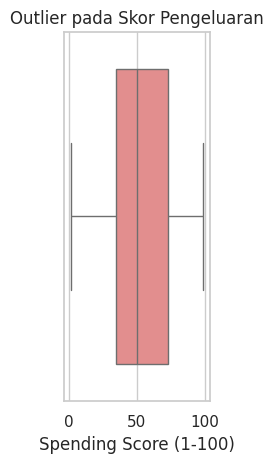

In [14]:
# Boxplot untuk Spending Score
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Spending Score (1-100)'], color='lightcoral')
plt.title('Outlier pada Skor Pengeluaran')

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
cek_nan

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Splitting Data & Preprocessing:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
# Convert 'Gender' to numerical
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [19]:
# Add 'Spending_Category': 1 for high spending, 0 for low spending
df['Spending_Category'] = df['Spending Score (1-100)'].apply(lambda x: 1 if x > 50 else 0)

In [20]:
# Define features and target
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['Spending_Category']

In [21]:

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Training Model

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# 2. Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)
y_pred_linreg = [1 if y > 0.5 else 0 for y in y_pred_linreg]  # Thresholding for classification
linreg_acc = accuracy_score(y_test, y_pred_linreg)

In [24]:
# Menghitung akurasi untuk Linear Regression
linreg_acc_decimal = accuracy_score(y_test, y_pred_linreg)

In [25]:
# Menampilkan hasil akurasi dalam bentuk desimal
print(f"Akurasi Linear Regression: {linreg_acc_decimal:.4f}")

Akurasi Linear Regression: 0.7000


In [26]:
# 3. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)

In [27]:
# Menghitung akurasi untuk Logistic Regression
logreg_acc_decimal = accuracy_score(y_test, y_pred_logreg)

In [28]:
# Menampilkan hasil akurasi dalam bentuk desimal
print(f"Akurasi Logistic Regression: {logreg_acc_decimal:.4f}")

Akurasi Logistic Regression: 0.7000


In [29]:
# 4. K-NN
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the value of 'k'
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

In [30]:
# Menghitung akurasi untuk K-NN
knn_acc_decimal = accuracy_score(y_test, y_pred_knn)

In [31]:
print(f"Akurasi K-NN: {knn_acc_decimal:.4f}")

Akurasi K-NN: 0.6667


In [32]:
# 5. Displaying accuracy results
print(f"Accuracy of Linear Regression: {linreg_acc * 100:.2f}%")
print(f"Accuracy of Logistic Regression: {logreg_acc * 100:.2f}%")
print(f"Accuracy of K-NN: {knn_acc * 100:.2f}%")

Accuracy of Linear Regression: 70.00%
Accuracy of Logistic Regression: 70.00%
Accuracy of K-NN: 66.67%


## Evaluating the Model:

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Menyimpan hasil akurasi dalam dictionary
results = {
    'Linear Regression': linreg_acc * 100,
    'Logistic Regression': logreg_acc * 100,
    'K-NN': knn_acc * 100
}

In [35]:
# Menentukan model dengan akurasi tertinggi
best_model = max(results, key=results.get)

In [36]:
# Menampilkan hasil akhir
print("\n=== Kesimpulan ===")
for model, acc in results.items():
    print(f"Akurasi {model}: {acc:.2f}%")


=== Kesimpulan ===
Akurasi Linear Regression: 70.00%
Akurasi Logistic Regression: 70.00%
Akurasi K-NN: 66.67%


In [37]:
print(f"\nModel dengan akurasi tertinggi: {best_model} dengan akurasi {results[best_model]:.2f}%")


Model dengan akurasi tertinggi: Linear Regression dengan akurasi 70.00%


In [38]:
# Justifikasi model terbaik
print("\n=== Alasan Memilih Model ===")
if best_model == 'Linear Regression':
    print("Model Linear Regression dipilih karena memiliki akurasi tertinggi. Meski digunakan untuk regresi, dengan thresholding, model ini dapat memprediksi dengan baik.")
    # Evaluasi model terbaik
    print("Confusion Matrix dan Classification Report untuk Linear Regression:")
    print(confusion_matrix(y_test, y_pred_linreg))
    print(classification_report(y_test, y_pred_linreg))
    
elif best_model == 'Logistic Regression':
    print("Model Logistic Regression dipilih karena cocok untuk klasifikasi biner dan memiliki akurasi tertinggi.")
    # Evaluasi model terbaik
    print("Confusion Matrix dan Classification Report untuk Logistic Regression:")
    print(confusion_matrix(y_test, y_pred_logreg))
    print(classification_report(y_test, y_pred_logreg))
    
elif best_model == 'K-NN':
    print("Model K-NN dipilih karena akurasinya tertinggi, dan cocok untuk prediksi berbasis tetangga terdekat.")
    # Evaluasi model terbaik
    print("Confusion Matrix dan Classification Report untuk K-NN:")
    print(confusion_matrix(y_test, y_pred_knn))
    print(classification_report(y_test, y_pred_knn))


=== Alasan Memilih Model ===
Model Linear Regression dipilih karena memiliki akurasi tertinggi. Meski digunakan untuk regresi, dengan thresholding, model ini dapat memprediksi dengan baik.
Confusion Matrix dan Classification Report untuk Linear Regression:
[[23  9]
 [ 9 19]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.68      0.68      0.68        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



## algoritma K-Means

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [40]:
# Dataset hanya mencakup fitur numerik yang relevan
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [41]:
# Menerapkan Elbow Method
ssd = []
K_range = range(1, 11)  # Menguji dari 1 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)  # inertia_ adalah SSD

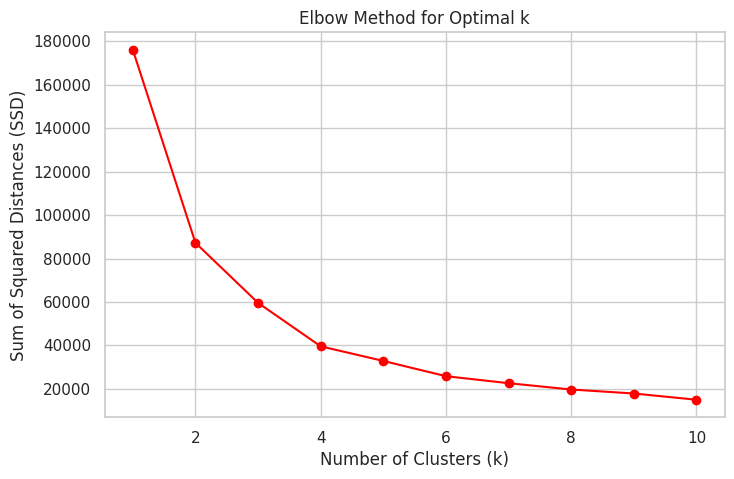

In [42]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, ssd, 'o-', color='red')  # Removed redundant 'marker' and 'color' definitions
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
# Memilih fitur numerik yang ingin di-scaling
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [45]:
# Melakukan scaling pada fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Melakukan K-Means clustering dengan k=3 (misalnya)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [47]:
# Menambahkan kolom hasil cluster ke dataset
df['Cluster'] = clusters

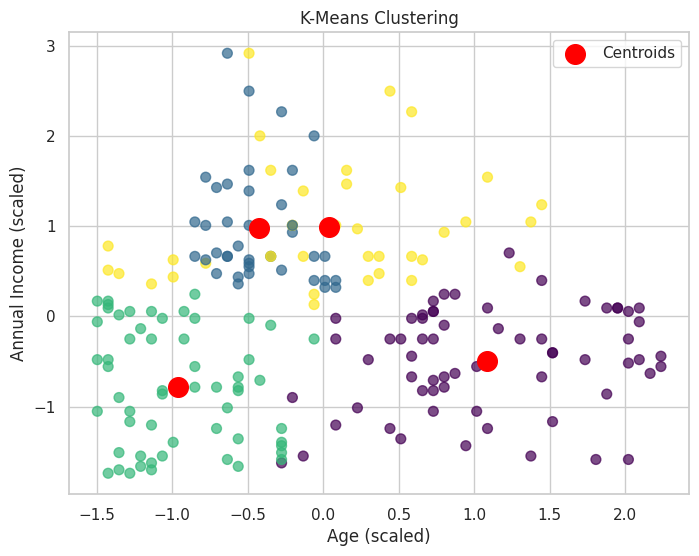

In [48]:
# Visualisasi hasil cluster dengan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.legend()
plt.show()